In [26]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [3]:
torch.set_grad_enabled(False)

In [2]:
fc = nn.Linear(4, 5)

In [14]:
# sigmoid is per item activation
z = fc(torch.arange(0, 4).float())
print(f'{z=}')
y = F.sigmoid(z)
print(f'{y=}')

z=tensor([ 0.3325,  0.3460,  0.5017, -1.4862, -1.4254])
y=tensor([0.5824, 0.5856, 0.6229, 0.1845, 0.1938])


In [19]:
# linear parameters are split into weights and bias
fc.weight

Parameter containing:
tensor([[ 0.0280, -0.3981,  0.1723,  0.0109],
        [ 0.1633,  0.0765, -0.1128,  0.1640],
        [ 0.4380, -0.4512,  0.4032,  0.0437],
        [ 0.2275,  0.1550, -0.4604, -0.1821],
        [ 0.1340, -0.4231, -0.3827, -0.0886]], requires_grad=True)

In [18]:
fc.bias

Parameter containing:
tensor([ 0.3533,  0.0029,  0.0156, -0.1741,  0.0288], requires_grad=True)

#### ReLU universal approximation function

In [7]:
import matplotlib.pyplot as plt

In [89]:
fc = nn.Linear(1, 3)

In [110]:
fc.weight = nn.Parameter(torch.tensor([[-1, 0.9, 0.3]]).float().T)
fc.bias = nn.Parameter(torch.tensor([1]).float())

In [115]:
def f(x, activation=F.relu):
    x = fc(x.T)
    x = activation(x)
    return x

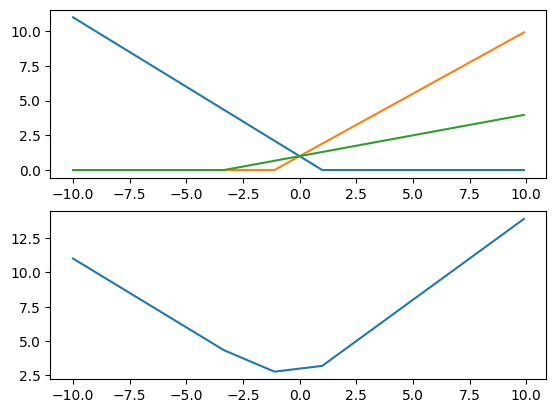

In [126]:
x = torch.arange(-10, 10, step=0.1).unsqueeze(0)
y = f(x)
plt.subplot(211)
plt.plot(x.flatten(), y)

plt.subplot(212)
plt.plot(x.flatten(), y.sum(dim=1))

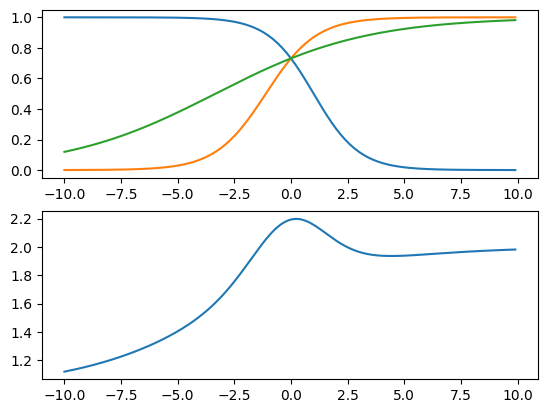

In [122]:
y = f(x, activation=F.sigmoid)
plt.subplot(211)
plt.plot(x.flatten(), y)

plt.subplot(212)
plt.plot(x.flatten(), y.sum(dim=1))

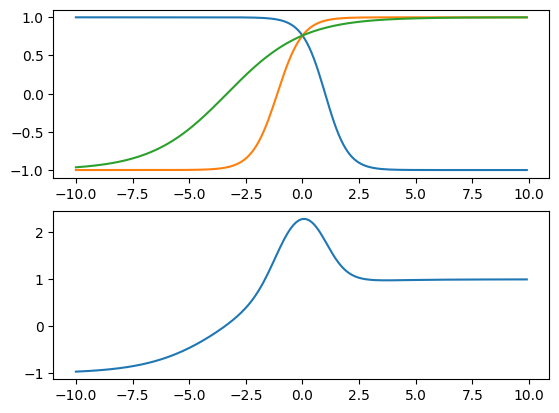

In [121]:
y = f(x, activation=F.tanh)
plt.subplot(211)
plt.plot(x.flatten(), y)

plt.subplot(212)
plt.plot(x.flatten(), y.sum(dim=1))

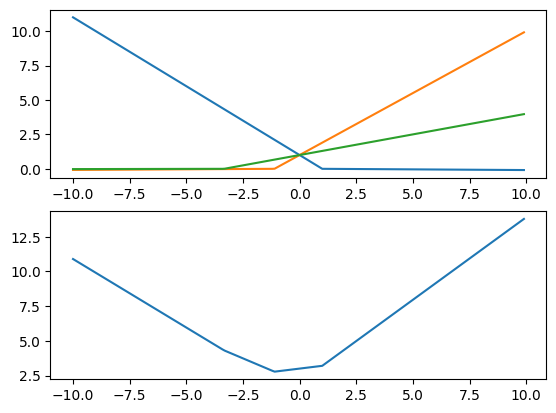

In [123]:
y = f(x, activation=F.leaky_relu)
plt.subplot(211)
plt.plot(x.flatten(), y)

plt.subplot(212)
plt.plot(x.flatten(), y.sum(dim=1))